In [1]:
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy.stats as st
import seaborn as sns 
%matplotlib inline

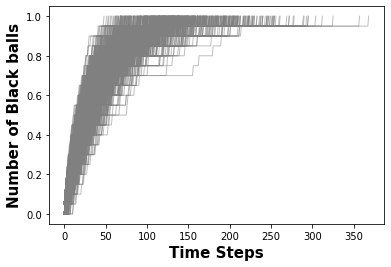

In [77]:
N = 20 # total number of balls

Bucket = np.zeros(N) #### implement the code by creating bucket --- might be slower--> not needed maybe

trials = 1000

m = 0 # fraction of balls already colored

TakeOver = []

for exp in range(trials):
    
    T = 0 # time it takes for all the balls to turn black
    b = 0 # number of black balls or discovered ideas 
    w = 0 # number of white balls or undiscovered ideas

    

    b = m

    frac = []
    time = []

    N_0 = N
    while b/N < 1:

        qm = ((N-b)*0.5)/N # probability of coloring a ball to black
#         qm = 1/N
        pm = 1-qm # probability that a ball remains uncolored

        pick = np.random.choice([True,False],p=[qm,pm])
        if pick:
            b+=1
            N_0 = N_0-1
        else:
            w+=1

        frac.append(b/N)
        time.append(T)
        T+=1
    TakeOver.append(time[-1])

    plt.plot(time,frac,color='grey',linewidth=1,alpha=0.5)
    
plt.xlabel('Time Steps', fontsize=15,fontweight='bold')
plt.ylabel('Number of Black balls', fontsize=15,fontweight='bold')
plt.show()   

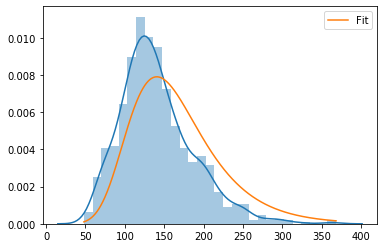

In [78]:
# u,s = st.gumbel_r.fit(TakeOver) #### MLE fitting to Gumbel distribution
u,s = st.norm.fit(TakeOver) #### MLE fitting to Normal distribution


x = np.linspace(min(TakeOver),max(TakeOver),1000)
y = st.gumbel_r.pdf(x,u,s)

##### viewing the fit function

sns.distplot(TakeOver)
plt.plot(x,y,label='Fit')
plt.legend()

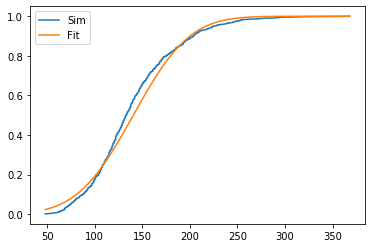

In [79]:
ecdf = ECDF(TakeOver)

# y_cdf = st.gumbel_r.cdf(x,u,s)
y_cdf = st.norm.cdf(x,u,s)

plt.plot(ecdf.x,ecdf.y,label='Sim')
plt.plot(x,y_cdf,label='Fit')
plt.legend()

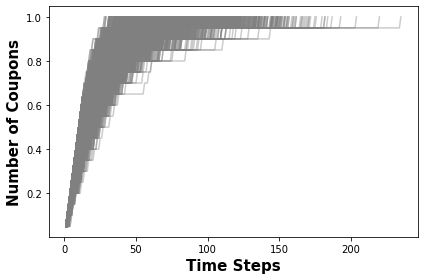

In [183]:
###### code for animating coupon collection ################

n_coupons = 20

T_tot = []

trials = 5000

plt.figure(figsize=(6,4))

for trial in range(trials):

    N = 5*n_coupons

#     plt.figure(figsize=(N/10,5))

    coup = []
    collected = []

    for i in np.arange(0,N*4,20):
        coup.append(i)

#         plt.plot(i,0,'o',color='black',markersize=15,markerfacecolor='white')

    T=[-1]
    t=0
    frac=[-1]
    record = [-1]
    while len(collected)/len(coup) < 1:
        pick = np.random.choice(coup)
        record.append(pick)
        if pick not in collected:
            collected.append(pick)
#             plt.plot(pick,0,'o',color='red',markersize=15)
        t += 1
        T.append(t)
        frac.append(len(collected)/len(coup))
    T_tot.append(T[-1])
    plt.plot(T[1:],frac[1:],color='gray',alpha=0.4)
    
# plt.axis('off')
plt.xlabel('Time Steps', fontsize=15,fontweight='bold')
plt.ylabel('Number of Coupons', fontsize=15,fontweight='bold')
plt.tight_layout()
plt.savefig('collection_time.png')
plt.show()


[60, 280, 160, 280, 20, 40, 100, 280, 260, 380, 160, 60, 100, 180, 240, 320, 40, 280, 120, 300, 200, 80, 140, 20, 0, 160, 320, 80, 200, 140, 280, 360, 380, 280, 120, 200, 60, 360, 80, 0, 320, 160, 360, 240, 260, 40, 100, 180, 120, 340, 260, 60, 360, 0, 100, 360, 340, 380, 300, 200, 320, 320, 260, 100, 100, 300, 300, 360, 360, 160, 220]


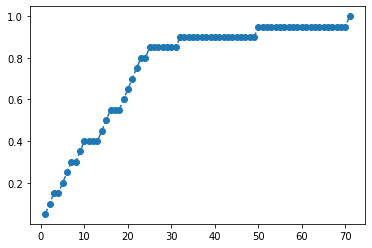

In [125]:
plt.plot(T[1:],frac[1:],'--o')

print(record[1:])

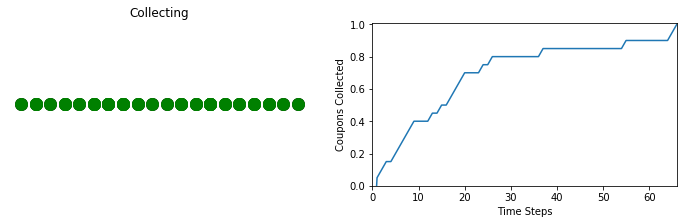

In [108]:
%matplotlib inline 
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x_data = []
y_data = []

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(121)
bx = fig.add_subplot(122)
bx.set_xlim(0, T[-1])
bx.set_ylim(0, 1.01)
bx.set_xlabel('Time Steps')
bx.set_ylabel('Coupons Collected')
line, = bx.plot(0, 0)

for i in np.arange(0,N*4,20):
    coup.append(i)
        
    ax.plot(i,0,'o',color='black',markersize=12,markerfacecolor='white')
ax.set_title('Collecting')
ax.axis('off')

global last_coupon, y
last_coupon = -1

def animation_frame(i,last_coupon=last_coupon):
     
    present_coupon = record[i]
        
    if present_coupon != last_coupon:
        
        ax.plot(record[i],0,'o',color='green',markersize=12)
        
    x_data.append(T[i])
    y_data.append(frac[i])

    line.set_xdata(x_data)
    line.set_ydata(y_data)
    
    last_coupon = present_coupon
    return line, 

animation = animation.FuncAnimation(fig, func=animation_frame, frames=np.array(list(range(len(T)))),\
                                    interval=200, blit=True,repeat=True)

animation.save('coupon_collect_2.gif', writer='pillow')

In [117]:
# ############## beginning with some coupons ################
# from IPython.display import HTML
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation

# n_coupons = 20

# N = 5*(n_coupons)

# plt.figure(figsize=(N/10,5))

# coup = []
# collected = []


# for i in np.arange(0,N*4,20):
#     coup.append(i)
        
#     plt.plot(i,0,'o',color='black',markersize=15,markerfacecolor='white')

# collected =  list(np.random.choice(coup,5))

# for i in collected:
            
#     plt.plot(i,0,'o',color='blue',markersize=15)


# T1=[-1]
# t1=0
# frac1=[-1]
# record1 = [-1]

# y=1

# while len(collected)/len(coup) < 1:
#     pick = np.random.choice(coup)
#     record.append(pick)
#     if pick not in collected:
#         collected.append(pick)
#         plt.plot(pick,0,'o',color='red',markersize=15)
#     else:
#         plt.plot(pick,y,'s',color='green',markersize=5,markeredgecolor='blue')
#     y+=0.2
#     t1 += 1
#     T1.append(t1)
#     frac1.append(len(collected)/len(coup))

# plt.axis('off')
# plt.show()
# plt.plot(T1[1:],frac1[1:],'--o',label='With initial Coupons')
# plt.plot(T[1:],frac[1:],'--o', label='without')
# # print(record1[1:])
# plt.legend()

print('Flawed code Their is some issue')

Flawed code Their is some issue


In [184]:
def nth_harmonic(h):
    
    return np.log(h) + 0.577216 + (1/(2*h))

In [185]:
E_T = n_coupons*nth_harmonic(n_coupons)

In [186]:
E_T

71.95896547107981

In [187]:
sum(T_tot)/len(T_tot)

71.7858

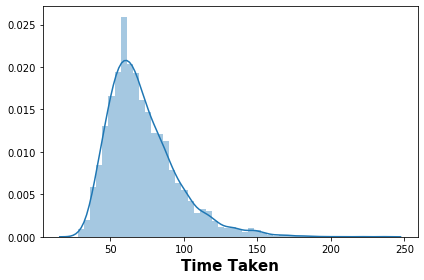

In [196]:
sns.distplot(T_tot)
plt.xlabel('Time Taken', fontsize=15,fontweight='bold')
plt.tight_layout()
plt.savefig('dist_time.png')

In [197]:
np.mean(T_tot)

71.7858

In [68]:
############## coupon collector on networks #######################

import networkx as nx

N,m,p = 100,2,0.024

Ger = nx.erdos_renyi_graph(N,p)
Gpr = nx.barabasi_albert_graph(N,m)
Gcp = nx.complete_graph(20)

In [69]:
pos_er = nx.drawing.nx_pydot.graphviz_layout(Ger)
pos_pr = nx.drawing.nx_pydot.graphviz_layout(Gpr)
pos_cp = nx.drawing.nx_pydot.graphviz_layout(Gcp)

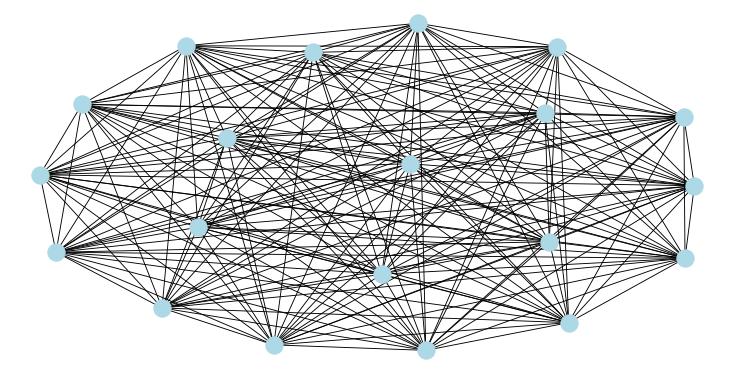

In [82]:
plt.figure(figsize=(10,5))
nx.draw(Gcp,pos=pos_cp,width=0.9,node_color='lightblue')
plt.savefig('cp.png')

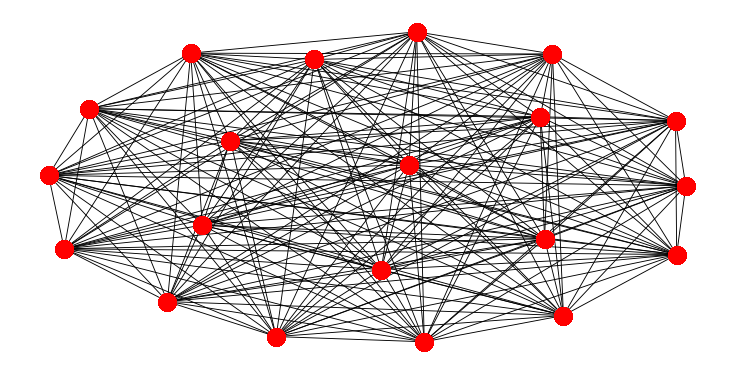

In [84]:
G,posG = Gcp,pos_cp
plt.figure(figsize=(10,5))
Takeover_time = [0]

infect = []
record = []
nodes = list(G.nodes())
frac = []
targets = nodes
t = 0
nx.draw(G,pos=posG,width=0.9,node_color='lightblue')


while (len(infect)/len(nodes) < 1 or t < 100) and len(record) < 50*N:
    
    if len(targets) != 0 :
    
        pick = np.random.choice(targets)
        record.append(pick)
        t+=1
        if pick not in infect:
            infect.append(pick)

        nx.draw_networkx_nodes(G,pos=posG,nodelist=infect,node_color='red')
        Takeover_time.append(t)
        frac.append(len(infect)/len(nodes))
        try:
            targets = list(nx.neighbors(G,pick))
        except:
            print('no neighbors')
            t+=1
            break
    else:
        break

plt.savefig('infect_cp.png')
plt.show()

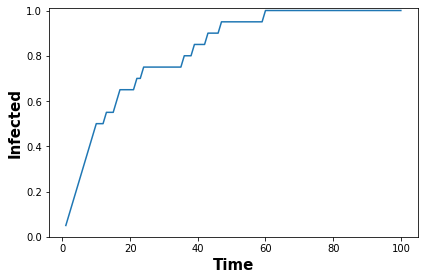

In [85]:
plt.ylim(0,1.01)
plt.plot(Takeover_time[1:],frac)
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.ylabel('Infected',fontsize=15,fontweight='bold')
plt.tight_layout()
plt.savefig('time_cp.png')